In [11]:
import pandas as pd
from konlpy.tag import Okt
from tqdm import tqdm
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [12]:
senti=pd.read_csv("knu_sentiment_lexicon.csv")
senti

,word,polarity
0,ㅡㅡ,-1
1,ㅠㅠ,-1
2,ㅠ_ㅠ,-1
3,ㅠ,-1
4,ㅜㅡ,-1
...,...,...
14849,(^-^),1
14850,(;_;),-1
14851,(-_-),-1
14852,(-;,1


In [13]:
DF=pd.read_csv('movie.csv')
DF

,제목,평점,감독,배우,개봉일자,줄거리
0,범죄도시3,7.6,이상용,마동석 이준혁 아오키 무네타카 이범수 김민재 이지훈 김도건 고규필 전석호 안세호,2023.05.31.,대체불가 괴물형사 마석도 서울 광수대로 발탁! 베트남 납치 살해범 검거 후 7년 뒤...
1,엘리멘탈(패키지: 자막판+더빙판+부가영상+코멘터리),9.4,피터 손,레아 루이스 마무두 아티,2023.06.14.,불 물 공기 흙 4개의 원소들이 살고 있는 ‘엘리멘트 시티’ 재치 있고 불처럼 열정...
2,공조2: 인터내셔날,8.3,이석훈,현빈 유해진 윤아 다니엘 헤니 진선규 장영남 박훈 임성재 윤상화 박민하,2022.09.07.,공조 이즈 백! 이번엔 삼각 공조다!남한으로 숨어든 글로벌 범죄 조직을 잡기 위해 ...
3,아바타: 물의 길(부가영상 제공),8.6,제임스 카메론,조 샐다나 샘 워싱턴 시고니 위버 우나 채플린 지오바니 리비시 스티븐 랭 케이트 ...,2022.12.14.,<아바타: 물의 길>은 판도라 행성에서 '제이크 설리'와 '네이티리'가 이룬 가족이...
4,올빼미,9.3,안태진,류준열 유해진 최무성 조성하 박명훈 김성철 안은진 조윤서 이주원 김예은,2022.11.23.,맹인이지만 뛰어난 침술 실력을 지닌 ‘경수’는어의 ‘이형익’에게 그 재주를 인정받아...
...,...,...,...,...,...,...
5191,트론: 새로운 시작,7.3,조셉 코신스키,제프 브리지스 가렛 헤드룬드 올리비아 와일드 마이클 쉰 애니스 처파 브루스 박스라...,2010.12.29.,세상 누구도 본적 없는 최고의 가상 현실을 창조한 천재박사 케빈 플린(제프 브리지스...
5192,리버티 벨런스를 쏜 사나이,8.4,존 포드,존 웨인 제임스 스튜어트 베라 마일즈 리 마빈 에드먼드 오브라이언 앤디 데빈 켄 ...,주연 존 웨인 제임스 스튜어트 베라 마일즈 리 마빈 에드먼드 오브라이언 앤디 데빈 ...,랜스(제임스 스튜어트 분)는 자신의 오래전 친구 톰(존 웨인 분)의 장례식에 참석하...
5193,리썰 웨폰,8.3,리차드 도너,멜 깁슨 대니 글로버 게리 부시 미치 라이언 톰 앳킨스 달린 러브,1987.12.01.,술집 여종업원인 아멘다 훤세커(Amanda Hunsaker: 잭키 스완슨 분)가 약...
5194,몽골리안 프린세스,7.5,정단우,정단우 엘리자베스 가르시아 박하나,2015.03.19.,34살이 되도록 연애 한번 못해보고 영화밖에 모르고 살아온 ‘단우’. 어느 날 본인...


In [14]:
DF['내용']=DF['제목']+' '+DF['줄거리']
DF

,제목,평점,감독,배우,개봉일자,줄거리,내용
0,범죄도시3,7.6,이상용,마동석 이준혁 아오키 무네타카 이범수 김민재 이지훈 김도건 고규필 전석호 안세호,2023.05.31.,대체불가 괴물형사 마석도 서울 광수대로 발탁! 베트남 납치 살해범 검거 후 7년 뒤...,범죄도시3 대체불가 괴물형사 마석도 서울 광수대로 발탁! 베트남 납치 살해범 검거 ...
1,엘리멘탈(패키지: 자막판+더빙판+부가영상+코멘터리),9.4,피터 손,레아 루이스 마무두 아티,2023.06.14.,불 물 공기 흙 4개의 원소들이 살고 있는 ‘엘리멘트 시티’ 재치 있고 불처럼 열정...,엘리멘탈(패키지: 자막판+더빙판+부가영상+코멘터리) 불 물 공기 흙 4개의 원소들이...
2,공조2: 인터내셔날,8.3,이석훈,현빈 유해진 윤아 다니엘 헤니 진선규 장영남 박훈 임성재 윤상화 박민하,2022.09.07.,공조 이즈 백! 이번엔 삼각 공조다!남한으로 숨어든 글로벌 범죄 조직을 잡기 위해 ...,공조2: 인터내셔날 공조 이즈 백! 이번엔 삼각 공조다!남한으로 숨어든 글로벌 범죄...
3,아바타: 물의 길(부가영상 제공),8.6,제임스 카메론,조 샐다나 샘 워싱턴 시고니 위버 우나 채플린 지오바니 리비시 스티븐 랭 케이트 ...,2022.12.14.,<아바타: 물의 길>은 판도라 행성에서 '제이크 설리'와 '네이티리'가 이룬 가족이...,아바타: 물의 길(부가영상 제공) <아바타: 물의 길>은 판도라 행성에서 '제이크 ...
4,올빼미,9.3,안태진,류준열 유해진 최무성 조성하 박명훈 김성철 안은진 조윤서 이주원 김예은,2022.11.23.,맹인이지만 뛰어난 침술 실력을 지닌 ‘경수’는어의 ‘이형익’에게 그 재주를 인정받아...,올빼미 맹인이지만 뛰어난 침술 실력을 지닌 ‘경수’는어의 ‘이형익’에게 그 재주를 ...
...,...,...,...,...,...,...,...
5191,트론: 새로운 시작,7.3,조셉 코신스키,제프 브리지스 가렛 헤드룬드 올리비아 와일드 마이클 쉰 애니스 처파 브루스 박스라...,2010.12.29.,세상 누구도 본적 없는 최고의 가상 현실을 창조한 천재박사 케빈 플린(제프 브리지스...,트론: 새로운 시작 세상 누구도 본적 없는 최고의 가상 현실을 창조한 천재박사 케빈...
5192,리버티 벨런스를 쏜 사나이,8.4,존 포드,존 웨인 제임스 스튜어트 베라 마일즈 리 마빈 에드먼드 오브라이언 앤디 데빈 켄 ...,주연 존 웨인 제임스 스튜어트 베라 마일즈 리 마빈 에드먼드 오브라이언 앤디 데빈 ...,랜스(제임스 스튜어트 분)는 자신의 오래전 친구 톰(존 웨인 분)의 장례식에 참석하...,리버티 벨런스를 쏜 사나이 랜스(제임스 스튜어트 분)는 자신의 오래전 친구 톰(존 ...
5193,리썰 웨폰,8.3,리차드 도너,멜 깁슨 대니 글로버 게리 부시 미치 라이언 톰 앳킨스 달린 러브,1987.12.01.,술집 여종업원인 아멘다 훤세커(Amanda Hunsaker: 잭키 스완슨 분)가 약...,리썰 웨폰 술집 여종업원인 아멘다 훤세커(Amanda Hunsaker: 잭키 스완슨...
5194,몽골리안 프린세스,7.5,정단우,정단우 엘리자베스 가르시아 박하나,2015.03.19.,34살이 되도록 연애 한번 못해보고 영화밖에 모르고 살아온 ‘단우’. 어느 날 본인...,몽골리안 프린세스 34살이 되도록 연애 한번 못해보고 영화밖에 모르고 살아온 ‘단우...


# 감성분석 점수 및 긍정, 부정, 중립 확인

### [1]

In [5]:
okt=Okt()

In [6]:
total_score=[]

for i in tqdm(DF['내용']):
    try:
        t=okt.normalize(i)
        score=0
        for w,p in zip(senti['word'], senti['polarity']):
            score=score+t.count(w)*p
    
        total_score.append(score)
    except:
        total_score.append(None)

100%|██████████| 5196/5196 [01:42<00:00, 50.79it/s]


In [15]:
DF['감성분석']=total_score

### [2]

In [16]:
total_box=[]
for j in tqdm(DF['내용']):
    try:
        t=okt.normalize(str(j))
        total_score=0

        for a,b in zip(senti['word'], senti['polarity']):
            if a in j:
                total_score+=b
        
        if total_score>0:
            total_box.append('긍정')
        elif total_score<0:
            total_box.append('부정')
        else:
            total_box.append('중립')
    except:
        total_box.append('중립')

100%|██████████| 5196/5196 [01:39<00:00, 52.14it/s]


In [17]:
DF['감성분석2']=total_box

In [4]:
import seaborn as sns
import koreanize_matplotlib
import matplotlib.pyplot as plt

sns.countplot(data=DF, x='감성분석2')
plt.title('감성분석 결과')

NameError: name 'DF' is not defined

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# 감정분석 결과 함수

In [24]:

def senti1(i):
    okt=Okt()
    
    idx=DF[DF['제목']==i].index[0]
    a=DF['내용'][idx]

    try:
        t=okt.normalize(a)
        score=0
        for w,p in zip(senti['word'], senti['polarity']):
            score=score+t.count(w)*p
    except:
        score=0

    try:
        if score>0:
            rst='긍정'
        elif score<0:
            rst='부정'
        else:
            rst='중립'
    except:
        rst='중립'
    
    
    return score, rst

In [29]:
i='몽골리안 프린세스'
senti1(i)

(-8, '부정')

In [15]:
def word_cloud(name):
    idx = DF[DF['제목']==name].index[0]
    text = DF['내용'][idx]

    total=[]
    
    # 의미없는 단어 제외
    drop_ = ['위해','이야기','해리','안나','선화','사라','한편','이제','과연','대한','점점','이자','다시']
    okt = Okt()
    for i in tqdm(okt.nouns(text)):
        # 한자리 제외
        if len(i)>1: 
            if i not in drop_ : total.append(i)

    result=Counter(total)

    dic={}
    # 100개 까지만 표시
    for a in tqdm(result.most_common(100)):
        dic[a[0]]=a[1]

    wc=WordCloud(width=400, height=800,background_color='white', 
                 font_path='BMDOHYEON_ttf.ttf')
    cloud=wc.generate_from_frequencies(dic)

    

    plt.axis('off')
    plt.imshow(cloud)

100%|██████████| 26/26 [00:00<00:00, 25360.91it/s]

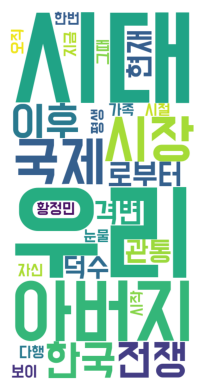

In [27]:
name = '국제시장(본편)'
word_cloud(name)